In [2]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import pandas as pd

In [ ]:
draw_infos = {
    "dqn_00": {
        "exp_name": "Base",
        "log_dir": "../runs/gym_maze/Maze-v0__dqn_00__00",
        "draw_dict": {"c": 'lightgray', "linewidth": 2},
    },
}

In [ ]:
for exp_name, draw_info in draw_infos.items():
    draw_infos[exp_name]['ea'] = EventAccumulator(draw_info['log_dir'])
    draw_infos[exp_name]['ea'].Reload()

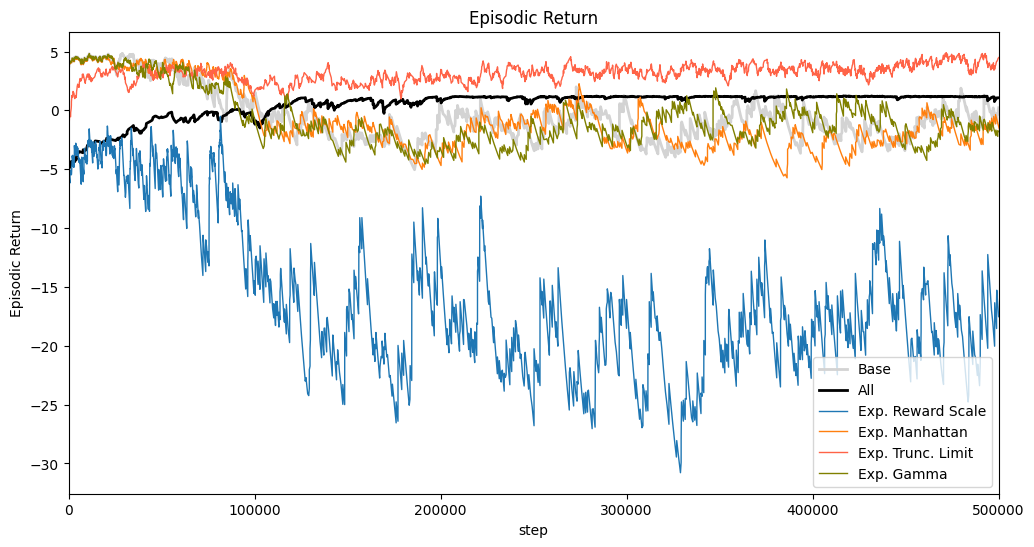

In [32]:
# ===== episodic_return =====
scalar_name = 'charts/episodic_return'
title = "Episodic Return"
xlim = (-100, 500000)
#ylim = 
smoothness = 30

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for draw_info in draw_infos.values():
    xs, ys = [], []
    
    for i, s in enumerate(draw_info['ea'].Scalars(scalar_name)):
        xs.append(s.step)
        ys.append(s.value)
        if s.step > xlim[1]: 
            break
    
    ys = pd.Series(ys).ewm(span=smoothness, adjust=False).mean()
    # ys_smooth = pd.Series(ys).rolling(window=50).mean()
    ax.plot(xs, ys, label=draw_info['exp_name'], **draw_info["draw_dict"])

ax.set_title(title)
ax.set_xlabel("step")
ax.set_ylabel(title)
ax.set_xlim(xlim)
#ax.set_ylim(-10, 6)
ax.legend(loc="lower right")


""" [
    ('charts/episodic_return', 40), 
    ('losses/td_loss', 0),
    ('losses/q_values', 0),
    ('eval/mean_ep_returns', 0),
    ('eval/moves_per_shortest', 0),
]
"""
fig.savefig("figures/DQN0x_EpReturn_sm30", dpi=300)

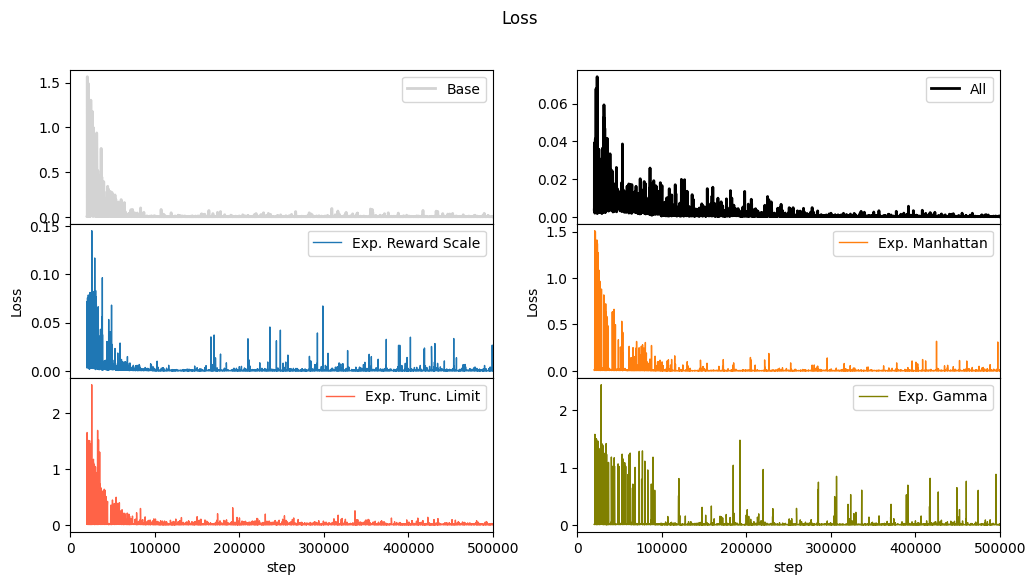

In [33]:
# ===== td_loss =====
scalar_name = 'losses/td_loss'
title = "Loss"
xlim = (-100, 500000)
#ylim = 

fig, axes = plt.subplots(3, 2, figsize=(12, 6))
for idx, draw_info in enumerate(draw_infos.values()):
    xs, ys = [], []
    i = idx // 2
    j = idx % 2

    for s in draw_info['ea'].Scalars(scalar_name):
        xs.append(s.step)
        ys.append(s.value)
        if s.step > xlim[1]: 
            break
    
    axes[i][j].plot(xs, ys, label=draw_info['exp_name'], **draw_info["draw_dict"])

    if i != 2: 
        axes[i][j].set_xticks([])
    else:
        axes[i][j].set_xlabel("step")

    if i == 1: 
        axes[i][j].set_ylabel(title)

    axes[i][j].legend()

    axes[i][j].set_xlim(xlim)
    #axes[i][j].set_ylim(-0.1, 2.)

fig.subplots_adjust(hspace=0)
fig.suptitle(title)
fig.savefig("figures/DQN0x_Loss", dpi=300)

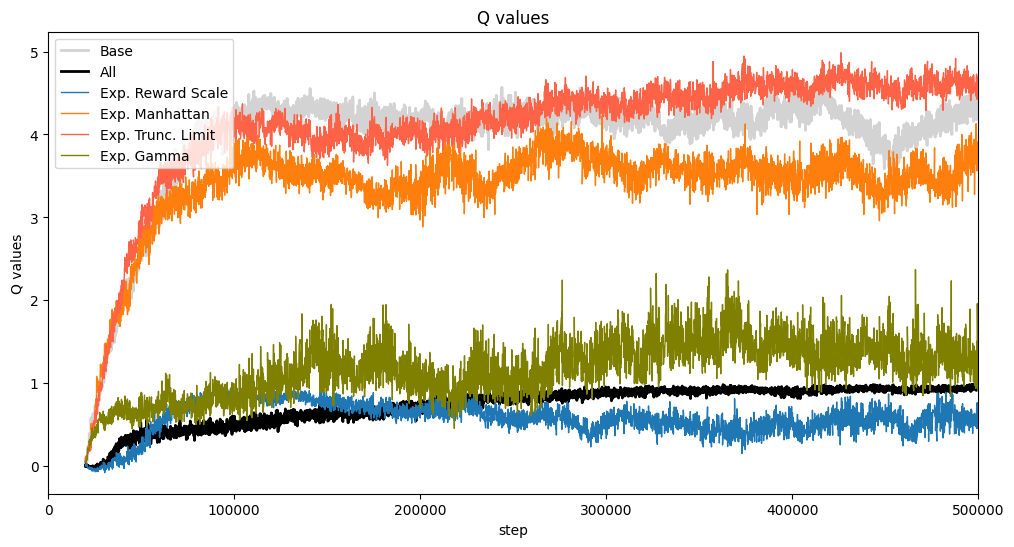

In [34]:
# ===== Q values =====
scalar_name = 'losses/q_values'
title = "Q values"
xlim = (-10, 500000)
#ylim = 

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for draw_info in draw_infos.values():
    xs, ys = [], []
    
    for i, s in enumerate(draw_info['ea'].Scalars(scalar_name)):
        xs.append(s.step)
        ys.append(s.value)
        if s.step > xlim[1]: 
            break
    
    ax.plot(xs, ys, label=draw_info['exp_name'], **draw_info["draw_dict"])

ax.set_title(title)
ax.set_xlabel("step")
ax.set_ylabel(title)
ax.set_xlim(xlim)
ax.legend(loc='upper left')

fig.savefig("figures/DQN0x_Qvalues", dpi=300)

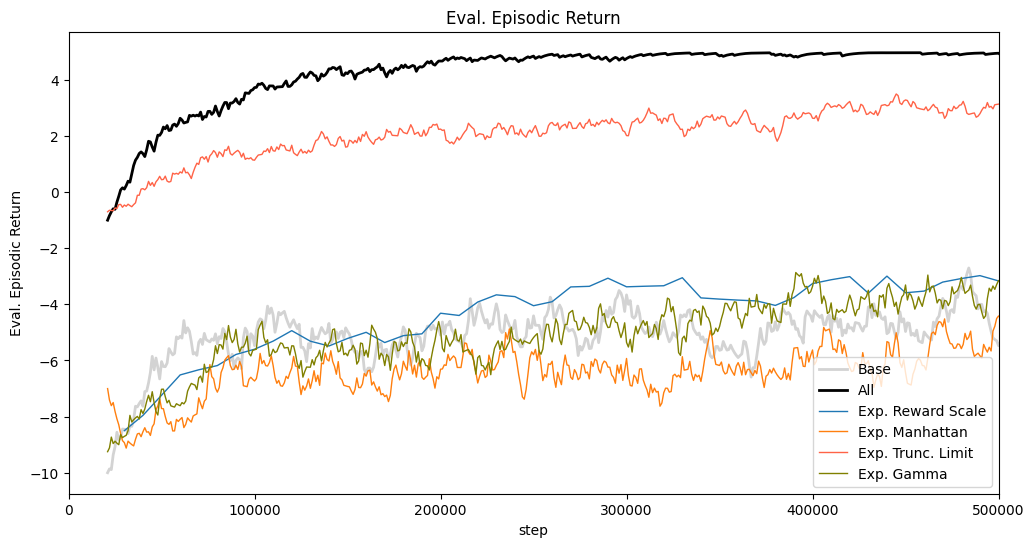

In [39]:
# ===== Eval. Episodic Return =====
scalar_name = 'eval/mean_ep_returns'
title = "Eval. Episodic Return"     # Averaged
xlim = (-10, 500000)
#ylim = 
smoothness = 10

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for draw_info in draw_infos.values():
    xs, ys = [], []
    
    for i, s in enumerate(draw_info['ea'].Scalars(scalar_name)):
        xs.append(s.step)
        ys.append(s.value)
        if s.step > xlim[1]: 
            break
    
    ys = pd.Series(ys).ewm(span=smoothness, adjust=False).mean()
    ax.plot(xs, ys, label=draw_info['exp_name'], **draw_info["draw_dict"])

ax.set_title(title)
ax.set_xlabel("step")
ax.set_ylabel(title)
ax.set_xlim(xlim)
ax.legend(loc='lower right')

fig.savefig("figures/DQN0x_EvalEpReturn_sm10", dpi=300)

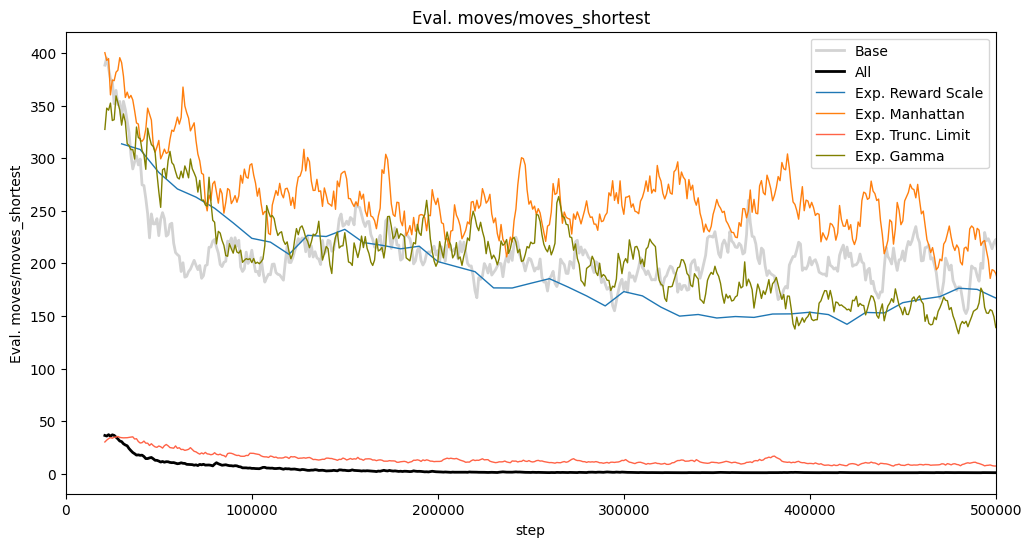

In [40]:
# ===== Eval. moves/moves_shortest =====
scalar_name = 'eval/moves_per_shortest'
title = "Eval. moves/moves_shortest"     # Averaged
xlim = (-10, 500000)
#ylim = 
smoothness = 10


fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for draw_info in draw_infos.values():
    xs, ys = [], []
    
    for i, s in enumerate(draw_info['ea'].Scalars(scalar_name)):
        xs.append(s.step)
        ys.append(s.value)
        if s.step > xlim[1]: 
            break
    
    ys = pd.Series(ys).ewm(span=smoothness, adjust=False).mean()
    ax.plot(xs, ys, label=draw_info['exp_name'], **draw_info["draw_dict"])

ax.set_title(title)
ax.set_xlabel("step")
ax.set_ylabel(title)
ax.set_xlim(xlim)
ax.legend()

fig.savefig("figures/DQN0x_EvalMoves_sm10", dpi=300)